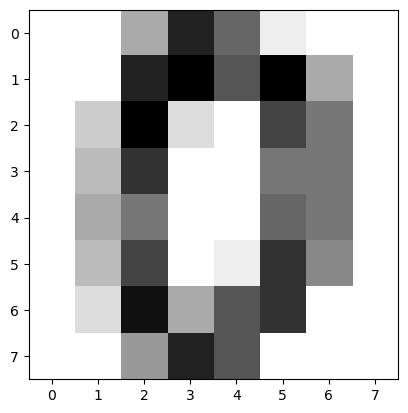

In [1]:

import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [2]:
n_samples = len(digits.images)

data = digits.images.reshape((n_samples, -1))

# 이미지를 평판화 n x sample x 8 8 => n_sample x 64

In [3]:
data.shape

(1797, 64)

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

X = data
y = digits.target

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [8]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
Y.shape

(1797, 10)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(50,input_shape=(64,),activation='sigmoid'))
model.add(Dense(40,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 50)                3250      
                                                                 
 dense_25 (Dense)            (None, 40)                2040      
                                                                 
 dense_26 (Dense)            (None, 30)                1230      
                                                                 
 dense_27 (Dense)            (None, 10)                310       
                                                                 
Total params: 6,830
Trainable params: 6,830
Non-trainable params: 0
_________________________________________________________________


c:\Users\TFG155\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [27]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
45/45 [==============================] - 1s 8ms/step - loss: 2.0352 - accuracy: 0.2651 - val_loss: 1.2605 - val_accuracy: 0.6167
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.8583 - accuracy: 0.7300 - val_loss: 0.5877 - val_accuracy: 0.7861
Epoch 3/100
45/45 [==============================] - 0s 4ms/step - loss: 0.6274 - accuracy: 0.8003 - val_loss: 0.5278 - val_accuracy: 0.8278
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.8128 - val_loss: 0.5015 - val_accuracy: 0.8194
Epoch 5/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.8476 - val_loss: 0.5217 - val_accuracy: 0.8000
Epoch 6/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4686 - accuracy: 0.8553 - val_loss: 0.8306 - val_accuracy: 0.7556
Epoch 7/100
45/45 [==============================] - 0s 3ms/step - loss: 0.4745 - accuracy: 0.8518 - val_loss: 0.3439 - val_accuracy: 0.9056
Epoch 8/100
4

In [28]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.94      0.94      0.94        35
           2       1.00      0.89      0.94        36
           3       0.85      1.00      0.92        29
           4       0.96      0.87      0.91        30
           5       0.93      0.93      0.93        40
           6       1.00      0.98      0.99        44
           7       0.87      1.00      0.93        39
           8       0.97      0.95      0.96        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 33  0  1  0  1  0  0  0  0]
 [ 0  0 32  3  0  0  0  0  1  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 1  0  0  0 26  1  0  2  0  0]
 [ 0  0  0  0  0 37  0  1  0  2]
 [ 0  0  0  0  1  0 43  0  0  0]
 [ 0  0  0